<a href="https://colab.research.google.com/github/XaviPat01/ML_TechAnalogy_Workshop/blob/main/Minor_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementing SVM from scratch**
> **Author**: Avi Patni

Basic implementation of a **linear SVM** model using **numpy**

For visualization, **matplotlib.pyplot**

For producing a random dataset, **sklearn.datasets**

In [123]:
#Importing Necessary Libraries
import numpy as np
import mlxtend
np.random.seed(21)
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

We need a data-set to train and test our model

We'll make one using sklearn.datasets.samples_generator

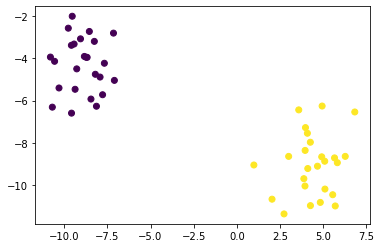

In [124]:
#Toy data-set

(X,y) = make_blobs(n_samples = 50, n_features=2, centers=2, cluster_std = 1.2, random_state=21)
X1 = np.array(X)
Xvals = list(X1[:,0])

plt.scatter(Xvals, X1[:,1], marker='o',c=y)
plt.show()

For SVM to work, we need to separate our data into 2 classes, say Group 1 represented by 1 and Group 2 by -1, instead of 1 and 0.

In [125]:
posX = []
negX = []
for i,v in enumerate(y):
  if v:
    posX.append(X[i])
  else:
    negX.append(X[i])

dataset = {-1:np.array(negX), 1:np.array(posX)}

The SVM hyperplane (decision boundary) is defined by the weight vector, $\vec{w}$, and the bias, $b$ as:

$$\vec{w}\cdot \vec{x} - b = 0$$

In the case of perfect separation (like we have taken) hyperplane(line in our case) is chosen so that we have maximum margin from the closest points.

While making a prediction: 
>Substituting a point from Group 1 (which we represent by +1) should give :
$$ \vec{w} \cdot \vec{x_i} + b \geq 0$$

>Substituting a point from Group 2 (which we represent by (-1)) should give:
$$ \vec{w} \cdot \vec{x_i} + b < 0 $$

In either case, the support vectors satisfy 
$$\vec{w} \cdot \vec{x_i} + b = \pm 1$$


As the data is labelled, we can judge if the prediction is correct or not by:  
$$
y_i \times (\vec{w} \cdot \vec{x} + b) = \left\{ 
  \begin{array}\\
  \geq0 & \mbox{if } \ correct \\
  <0 & \mbox{if } \ incorrect \\
  \end{array}
  \right.
$$
where $y_i$ represents the label.
 

##Implementation 1

reference: Sentdex

In [126]:
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'g',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        maxval = float('-inf')
        minval = float('+inf')

        
        for elem in self.data:
          if np.amax(self.data[elem])>maxval:
            self.maxval = np.amax(self.data[elem])
            print(self.maxval)
          
          if np.amin(self.data[elem])<minval:
            self.minval = np.amin(self.data[elem])
            print(f"Min {self.minval}")

        all_data = None

        step_sizes = [self.maxval * 0.1,
                      self.maxval * 0.01,
                      ]

        b_range_multiple = 2
        b_multiple = 5
        latest_optimum = self.maxval*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.maxval*b_range_multiple),
                                   self.maxval*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
                      

    def predict(self,features):
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i],linewidths=0) for x in self.data[i]] for i in self.data]
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.minval*0.9,self.maxval*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],'k',marker='o')

        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k',marker='o')

        #hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        

-2.003068668082264
Min -10.797232930211987
6.832278306640327
Min -11.378573826608338
Optimized a step.
Optimized a step.


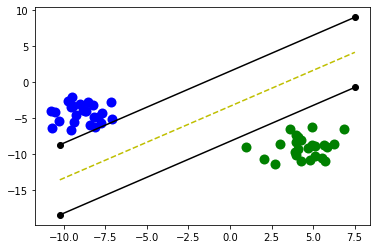

In [127]:
svm = Support_Vector_Machine()
svm.fit(data=dataset)

svm.visualize()

##Implementation 2: **As shown in class**

In [152]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        self.data = X
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

    def visualize_svm(self):
      """
      Visualize the svm
      """

      X = self.data
      w = self.w
      b = self.b

      def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]
      
      fig = plt.figure(figsize=(10, 5))
      ax = fig.add_subplot(1,1,1)
      plt.scatter(X[:,0], X[:,1], marker='o',c=y)

      x0_1 = np.amin(X[:,0])
      x0_2 = np.amax(X[:,0])

      x1_1 = get_hyperplane_value(x0_1, w, b, 0)
      x1_2 = get_hyperplane_value(x0_2, w, b, 0)

      x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
      x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

      x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
      x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

      ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
      ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
      ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

      x1_min = np.amin(X[:,1])
      x1_max = np.amax(X[:,1])
      ax.set_ylim([x1_min-2,x1_max+2])
      plt.tight_layout()

      plt.show()

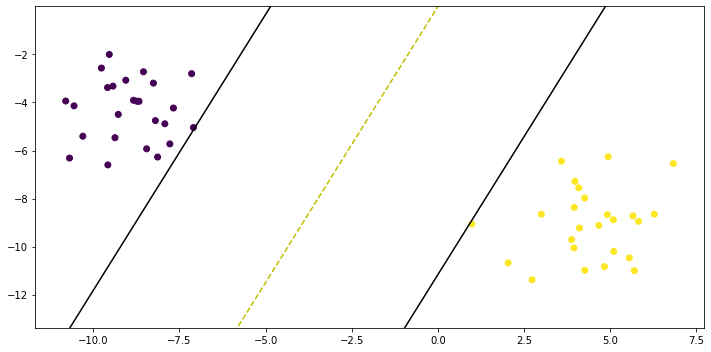

In [153]:
clf = SVM()
clf.fit(X,y)

clf.visualize_svm()